<a href="https://colab.research.google.com/github/dornercr/INFO371/blob/main/INFO371_Week6_Retail_Support_Intent_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# SECTION 1: Imports
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# SECTION 2: Dataset Generation (Retail Support)
retail_intents = {
    "order_tracking": [
        "Where is my package?", "How do I track my order?", "Order hasn't arrived yet.",
        "Delivery status update please.", "Can you give me my tracking info?"
    ],
    "return_request": [
        "I want to return a product.", "How do I send back this item?", "Requesting return for damaged goods.",
        "The product didn’t match the description.", "Please initiate a return for me."
    ],
    "product_inquiry": [
        "What material is this shirt made of?", "Do you have this in medium?", "Is this item in stock?",
        "What colors are available for this product?", "Are there customer reviews for this?"
    ],
    "account_support": [
        "I can't log into my account.", "Forgot my password, need help.", "Account got locked after too many tries.",
        "Need to update my email address.", "Can you help me change my shipping info?"
    ],
    "payment_issue": [
        "My card was charged twice.", "Why was my payment declined?", "I used the wrong card, how do I fix it?",
        "Payment isn’t going through.", "How can I add a new payment method?"
    ]
}

noise_templates = {
    "order_tracking": ["track # not working", "where tf my pack", "says delivered nothing", "delay again ugh", "help find item"],
    "return_request": ["broken item want $$", "wrong size sent", "cant find return link", "refund this asap", "pls take back"],
    "product_inquiry": ["this itchy?", "pic same as item?", "how big med?", "color same irl?", "new or refurbished?"],
    "account_support": ["locked out again", "reset pass dont work", "change email plz", "wrong addr showing", "login loop hell"],
    "payment_issue": ["paid twice?", "card fail why", "paypal not showing", "wrong card used", "fix billing info"]
}

confusing_samples = [
    ("Tracking not working and want refund", "order_tracking"),
    ("Need to change payment and return product", "payment_issue"),
    ("Can't login and track my item", "account_support"),
    ("Wrong size arrived, requesting return", "return_request"),
    ("Is this item in stock and available in blue?", "product_inquiry")
]

clean_data = []
for label, phrases in retail_intents.items():
    for _ in range(300):
        base = random.choice(phrases)
        variation = random.choice([
            base,
            base.lower(),
            base + " Please help.",
            "Hey! " + base[0].lower() + base[1:],
            base.replace("?", "") + "?",
            base + " Thanks."
        ])
        clean_data.append((variation.strip(), label))

noisy_data = []
for label, phrases in noise_templates.items():
    for _ in range(15):
        noisy_data.append((random.choice(phrases), label))

full_data = clean_data + noisy_data + confusing_samples
df_retail = pd.DataFrame(full_data, columns=["text", "intent"])

# SECTION 3: Encode & Split
X = df_retail["text"]
y = LabelEncoder().fit_transform(df_retail["intent"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# SECTION 4: Add Label Noise
y_train_noisy = y_train.copy()
noise_indices = np.random.choice(len(y_train), size=int(0.05 * len(y_train)), replace=False)
y_train_noisy[noise_indices] = np.random.permutation(y_train_noisy[noise_indices])

# SECTION 5: Train Decision Tree on Binary BoW
vectorizer = CountVectorizer(binary=True)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
clf = DecisionTreeClassifier()
clf.fit(X_train_vec, y_train_noisy)
y_pred = clf.predict(X_test_vec)

# SECTION 6: Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# SECTION 7: PCA Transformation for 2D Visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_vec.toarray())

# SECTION 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the report
print("=== Classification Report (Per Class) ===")
display(df_report.round(3))  # Use .round(3) to clean up decimals


# Ready for PCA plot and heatmap
(X_test_pca, y_test, y_pred, cm)


=== Classification Report (Per Class) ===


,precision,recall,f1-score,support
0,1.0,1.0,1.0,63.0
1,1.0,1.0,1.0,63.0
2,1.0,1.0,1.0,63.0
3,1.0,1.0,1.0,64.0
4,1.0,1.0,1.0,63.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,316.0
weighted avg,1.0,1.0,1.0,316.0


(array([[-0.29863847, -0.44278758],
        [ 0.82348774, -0.15794334],
        [ 1.13918951, -0.13264461],
        [-0.06438846,  0.04252339],
        [ 0.90314795, -0.05803397],
        [-0.69394549,  0.61230835],
        [ 0.24339784,  1.19991146],
        [ 0.24339784,  1.19991146],
        [-0.234085  , -0.81428614],
        [ 0.24634531, -0.0198269 ],
        [-0.11362331, -0.29946756],
        [ 1.66251027, -0.04681033],
        [ 0.27502372, -0.79873996],
        [-0.06438846,  0.04252339],
        [-1.03531432,  0.27244544],
        [ 0.56837127,  0.53744024],
        [-1.17270972, -0.37021287],
        [-1.36081597, -1.08781166],
        [-1.1424505 ,  0.17095889],
        [ 0.31961434, -0.31278057],
        [ 0.05405943, -0.55906908],
        [ 0.74844637, -0.03952712],
        [ 0.12273504,  0.72150094],
        [-0.03858193, -0.41788378],
        [-1.17270972, -0.37021287],
        [ 0.28830944, -0.07375811],
        [-1.11687545,  1.52281765],
        [-0.07968305, -0.079

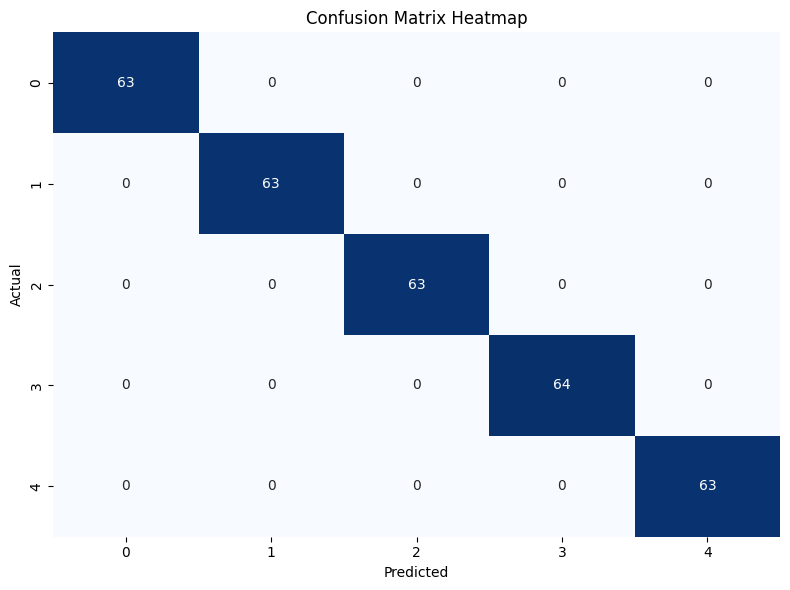

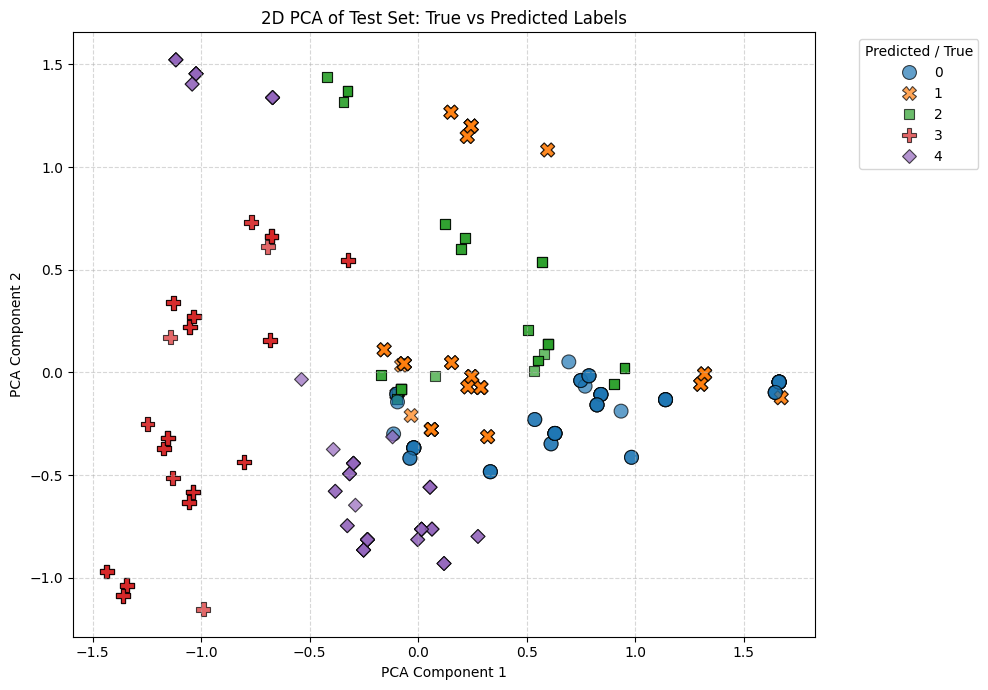

In [17]:
# CONFUSION MATRIX HEATMAP
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# PCA SCATTER PLOT (Decision Boundaries Approximation)
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(
    x=X_test_pca[:, 0], y=X_test_pca[:, 1],
    hue=y_pred, style=y_test,
    palette="tab10", s=100, alpha=0.7, edgecolor="black"
)
plt.title("2D PCA of Test Set: True vs Predicted Labels")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Predicted / True", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_retail["intent"])
print(dict(zip(le.transform(le.classes_), le.classes_)))


{np.int64(0): 'account_support', np.int64(1): 'order_tracking', np.int64(2): 'payment_issue', np.int64(3): 'product_inquiry', np.int64(4): 'return_request'}
